In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("suicide.csv")
df


,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [8]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [9]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [11]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [12]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [31]:
df['State'].nunique()

38

In [18]:
df['Year'].nunique()




12

In [19]:
df['Age_group'].nunique()

6

In [20]:
df['Type'].nunique()

69

In [21]:
df['State'].nunique()

38

In [ ]:
df['Total'].nunique()

2180

In [29]:
indian_states = [
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", 
    "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jharkhand", "Karnataka", 
    "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", 
    "Mizoram", "Nagaland", "Odisha", "Punjab", "Rajasthan", "Sikkim", 
    "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal"
]
states_in_df = df['State'].unique()

# Find states that are not in the predefined list of Indian states
non_indian_states = [state for state in states_in_df if state not in indian_states]

# Print the states that are not in the predefined list
print("States not in the predefined list of Indian states:")
for state in non_indian_states:
    print(state)

States not in the predefined list of Indian states:
A & N Islands
Chandigarh
D & N Haveli
Daman & Diu
Delhi (Ut)
Jammu & Kashmir
Lakshadweep
Puducherry
Total (All India)
Total (States)
Total (Uts)


In [37]:
for state in non_indian_states:
    print(state)

# Remove rows with state names that are not in the predefined list
df = df[df['State'].isin(indian_states)]

# Display the cleaned DataFrame
print(df)

A & N Islands
Chandigarh
D & N Haveli
Daman & Diu
Delhi (Ut)
Jammu & Kashmir
Lakshadweep
Puducherry
Total (All India)
Total (States)
Total (Uts)
                 State  Year      Type_code                    Type  Gender  \
6712    Andhra Pradesh  2001         Causes               Paralysis  Female   
6713    Andhra Pradesh  2001         Causes                 Poverty  Female   
6714    Andhra Pradesh  2001         Causes    Death of Dear Person  Female   
6715    Andhra Pradesh  2001         Causes  Failure in Examination  Female   
6716    Andhra Pradesh  2001         Causes         Family Problems  Female   
...                ...   ...            ...                     ...     ...   
237514     West Bengal  2012  Social_Status               Seperated    Male   
237515     West Bengal  2012  Social_Status         Widowed/Widower    Male   
237516     West Bengal  2012  Social_Status                 Married    Male   
237517     West Bengal  2012  Social_Status                Divorc

In [40]:

statewise_df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

In [41]:
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total'] == 0].index)

In [43]:

statewise_df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)
statewise_df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True)

Total number of suicides in each year:  Year
2001    531521
2002    541471
2003    543385
2004    557573
2005    557517
2006    577759
2007    600306
2008    612897
2009    622423
2010    659768
2011    662677
2012    631332
Name: Total, dtype: int64


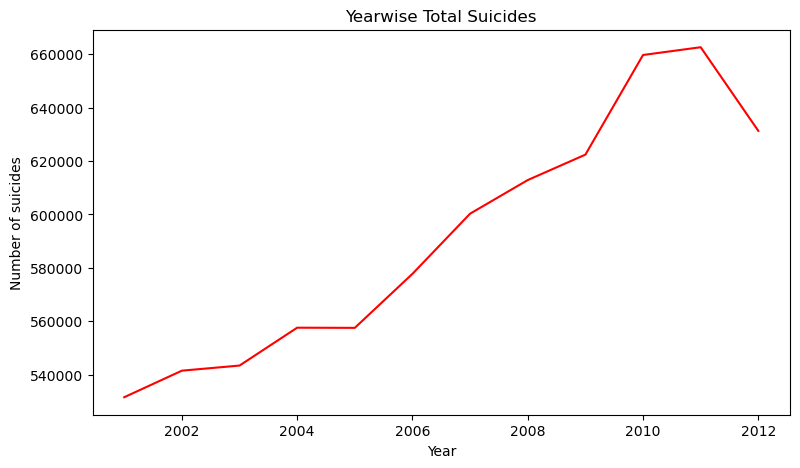

In [45]:
yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

Total number of suicides in each State :  State
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chhattisgarh         302354
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jharkhand             49720
Karnataka            734825
Kerala               538946
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496
West Bengal          849936
Name: Total, dtype: int64


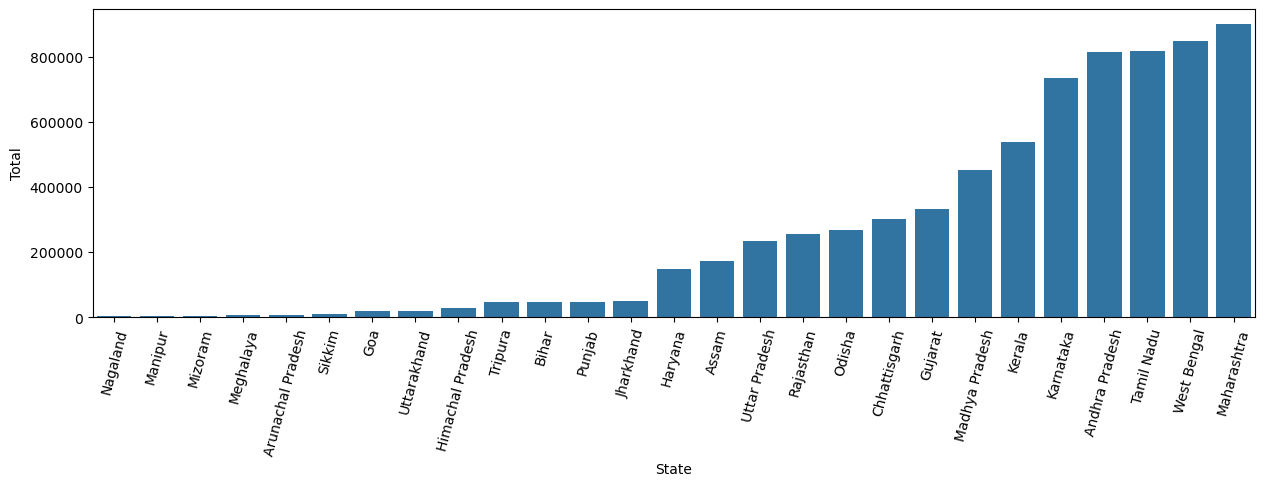

In [46]:
statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()
print('Total number of suicides in each State : ', statewise_total_suicide)

#plotting the above data
filter_state = pd.DataFrame(statewise_total_suicide.reset_index()) 
sort_state = filter_state.sort_values('Total',ascending = True)
f, ax = plt.subplots(figsize=(15, 4))
#sns.barplot(y = 'Total', x = 'State',data = sort_state,edgecolor = '0.5')
sns.barplot(y = 'Total', x = 'State',data = sort_state)
plt.xticks(rotation=75);
plt.show()

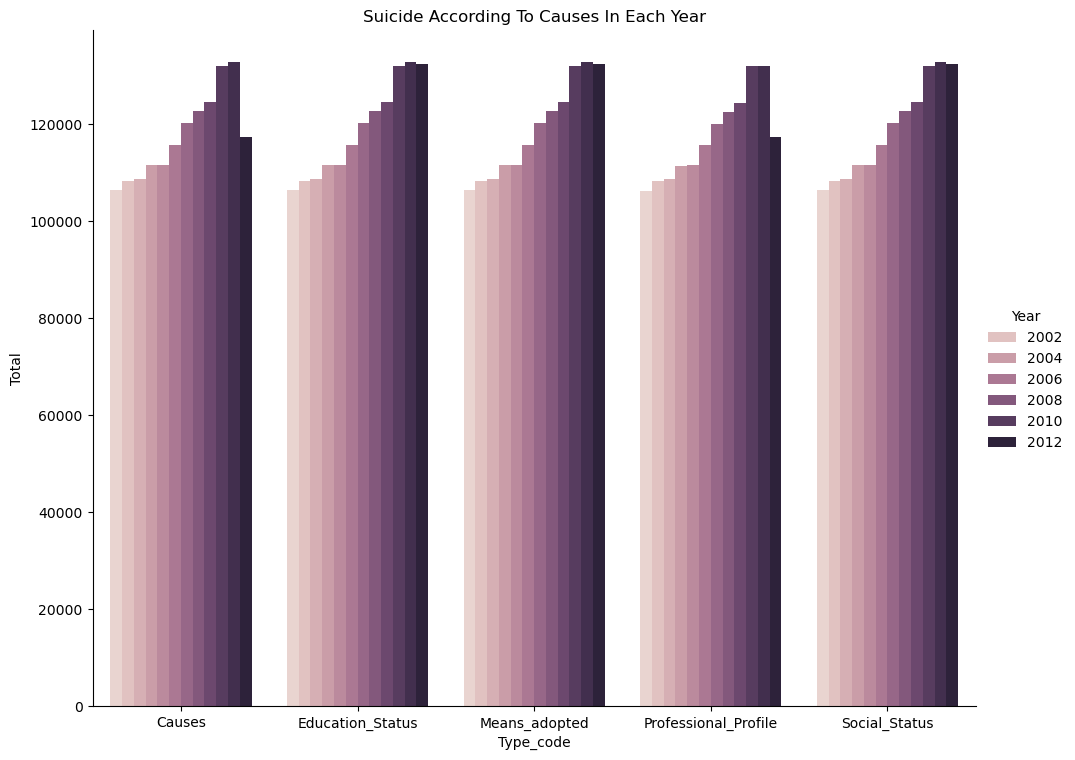

In [47]:
filter_type_code = pd.DataFrame(statewise_df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

#Plotting the above data
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=10/7.5);
plt.title('Suicide According To Causes In Each Year');

Gender
Male      48237
Female    41298
Name: count, dtype: int64


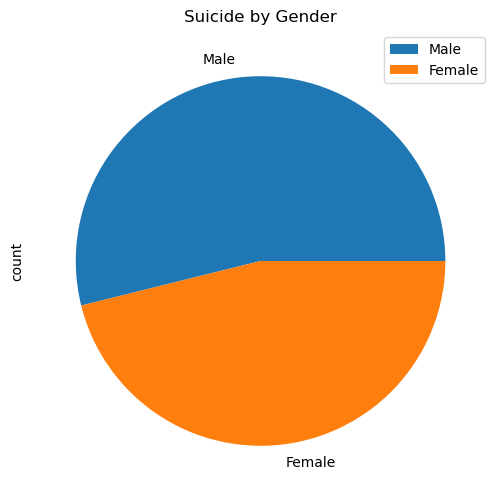

In [ ]:
#Q.4 Suicide According To Gender
counts = statewise_df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

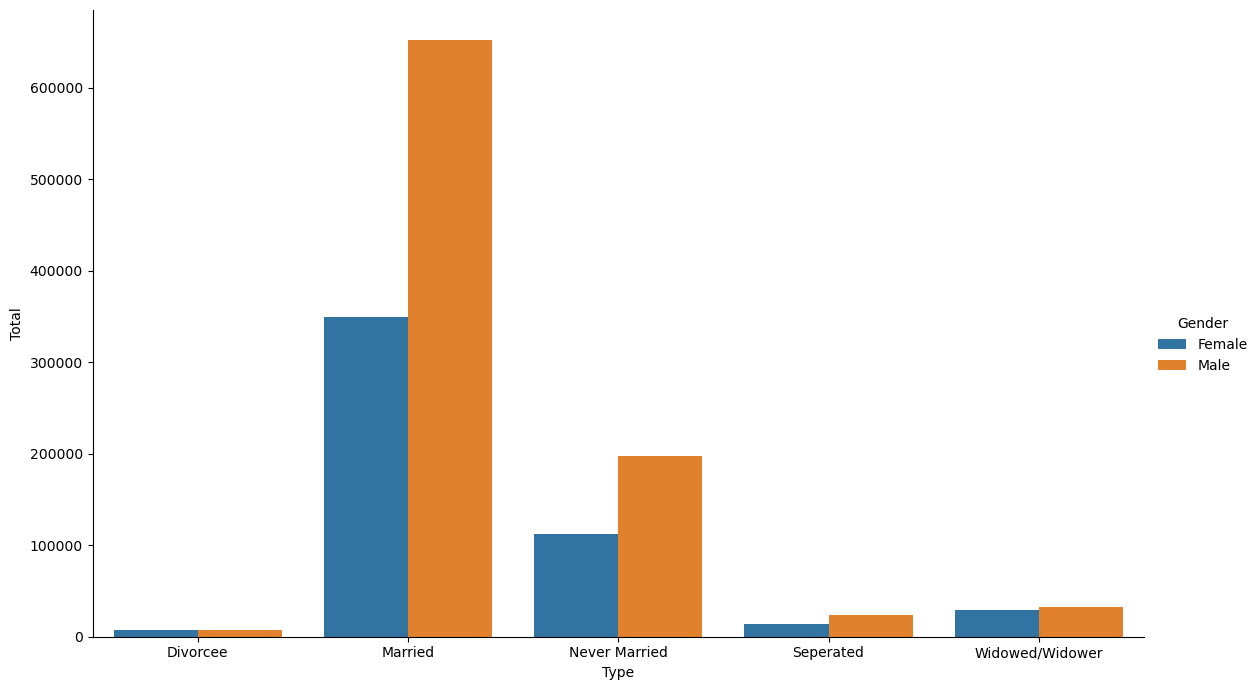

In [ ]:
#Q.Suicides By Social Status
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()

#plotting the above data
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);

Age_group
0-14      8931
15-29    21665
30-44    21264
45-59    17736
60+      12536
Name: count, dtype: int64


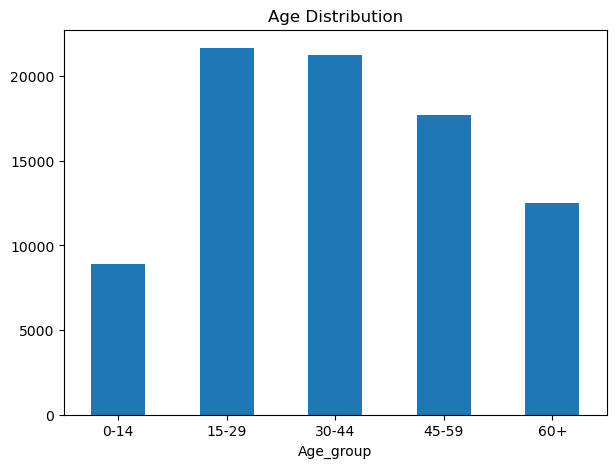

In [52]:
#Age Distributiion
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

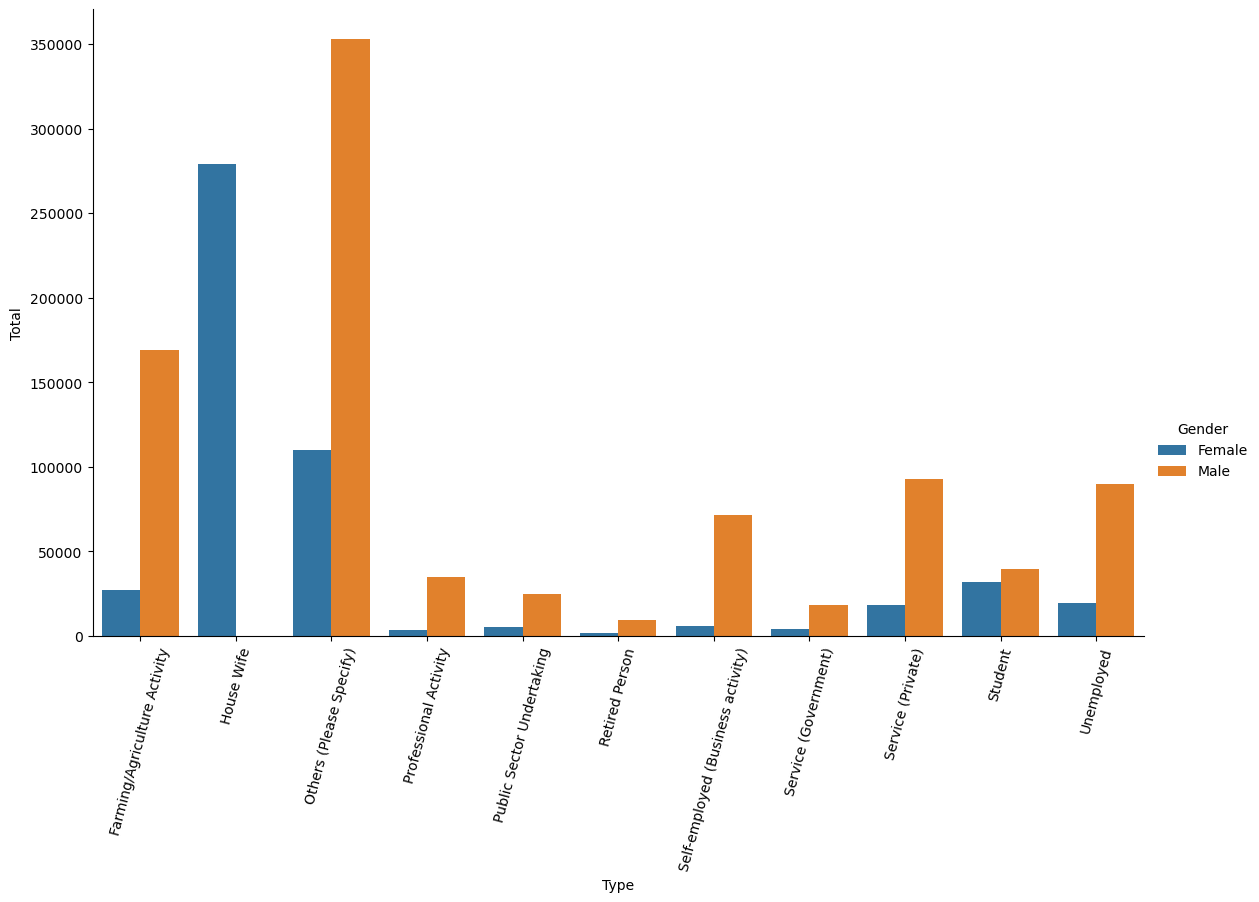

In [53]:
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);
g.set_xticklabels(rotation=75);

# Inferences and Conclusion
**According to the above analysis we can conclude the following things:**

1.] Males tend to commit more suicides compared to Females in India

2.]Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu. 

3.]If the trend continues the number of suicides will increase in the future 

**People who commit suicide are mostly:**
1.]Married

2.]Farmers and housewives

3.]Youngsters (15-29 age) and middle aged (30-44)

4.]Don't have proper or any professional education